In [301]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold

df_pre = pd.read_csv("PreProcessedData.csv")
df_pre.drop('Unnamed: 0', inplace=True, axis=1)

def TrainingData(df_pre):
    # make a lsit of columns
    columns=list(df_pre.columns)
    index = columns.index("Lowest distortion")
    #remove Lowest column from data set to compare
    y_col = columns.pop(index)
    # turn Lowest Distortion column to numpy array
    y = df_pre[y_col].to_numpy()
    # send all other columns to numpy array
    X = df_pre[columns].to_numpy()
    #Define training and testing values and set test size
    X_train,X_test,y_train, y_test=train_test_split(X,y, test_size=0.3)
    
    return X, X_train, X_test, y,  y_train, y_test 

def LogReg(X_train, X_test, y_train, y_test):
    # load Logistic regression function
    Lr=LogisticRegression()
    # fit data using training data
    Lr.fit(X_train,y_train)
    # Score data from test data
    score = Lr.score(X_test,y_test)
    
    return score, Lr

# MOST OF THIS FUNCTION IS IRRELEVANT AT THE MOMENT AS I HAVENT TESTED ESTIMATORS. I JUST RETURNED "RF" TO MAKE KFOLD WORK
def RanForest(X_train, X_test, y_train, y_test):
    # set a new array
    mean = []
    #count = []

    for i in range(1, 5):
        #run a RandomForestClassifier with i estimaters in the range a to b with an interval of c
        RF=RandomForestClassifier(n_estimators=i)
        # fit random forest classifier using X_train and y_train data
        RF.fit(X_train,y_train)
        # calculate score
        score = RF.score(X_test,y_test)
        #print(score)
        #append score to array
        mean.append(score)
    # Turn "mean" array to a numpy array
    mean = np.array(mean)
    #calculate mean of data
    meantot = mean.mean()
    
    
    return RF

def crossval(score, LR):
    a=cross_val_score(Lr,X,y,cv=3)
    #a,a.mean()
    mean = a.mean()
    return mean

# I DONT KNOW ALL OF THIS SO I WILL SAY IF NOT AND JUST FILL IN PLS?
def findbeststratkfold(X_train, X_test, y_train, y_test, RF):
    # send all values to an array
    accuracy = [0]
    # can remove this i think?
    Bestpredict = []
    #test between 2 and 10 splits
    for i in range(2,10):
        # set a variable to find splits I THINK?
        stk = StratifiedKFold(n_splits=i, random_state=None, shuffle = False)
        # get splits in 2 dimensions -->?? 
        stk.get_n_splits(X,y)
        #IDK WHAT THIS DOES BUT ITS SICK
        for train_index, test_index in stk.split(X,y):
            X1_train, X1_test = X[train_index], X[test_index]
            y1_train, y1_test = y[train_index], y[test_index]
            RF.fit(X1_train,y1_train)
            prediction = RF.predict(X1_test)
                  
            
            ############ found error - had to import metrics
            #finds score
            score = metrics.accuracy_score(prediction,y1_test)

            # appends score to accuracy
            accuracy.append(score)
            # finds maximum accuracy
            maximum = max(accuracy)
            # if our score found in THIS current iteration is equal to our maximum value SO FAR then --> Save as BestPrediction and a finalscore
            if score == maximum:
                # these are the two values i just mentioned
                Bestpredict = prediction.copy()
                Best_y = y1_test.copy()
                finalscore = score
                #print(finalscore)
            else:
                next

    
            
    return Bestpredict, finalscore, Best_y

    #accuracy,np.array(accuracy).mean()
    
#PLEASE NOT COMPARE FUNCTION NOT WORK WELL AND NOT USED
def compare(finalscore, test, predict):
    # set all counts to  0

    # set length for repetition
    length = len(predict)
    #print(l)


    
    #totlist = list(zip(bestpredict, test))
    #
    #reference = Counter(test)
    #reference = dict.values(reference)
    #set count to 0
    i = 0
    # set list for columns names
    structure = ["cubic","orthorhombic","tetragonal","rhombohedral"]
    # create a 4x4 array filled with 0's, index and columns labelled using structure
    array = pd.DataFrame(np.zeros((4, 4)), index=structure, columns=structure)
    #loop with length of array
    for i in range(0,length):
        # loop for all values in structure from predicted dataset
        for m in structure: # predicted
            # loop for all values in structure from test dataset
            for k in structure: # test
                # if value in predicted dataset = value in structure
                if bestpredict[i] == m:
                    # if value in test dataset = value in structure
                    if test[i] == k:
                        # find point in array and add 1 to its total
                        array.loc[m][k] += 1
    #print(Counter(test))
    # make reference data using Counter function --> gives a dictionary with 4 values in
    reference = Counter(test)  
    # turns dictionary to dataframe
    data = pd.DataFrame(reference, index=[0])
    # sets columns in right order
    data = data[["cubic","orthorhombic","tetragonal","rhombohedral"]]
    # creates a 4x4 matrix
    data = pd.concat([data]*4,ignore_index=True)
    #print(data)
    # index's data using previously defined structure
    data.index = (structure)
    #print(array)
    #print(data)
    #NEED TO SEND THIS TO NEW FILE AND LOOP FOR REMOVED COLUMNS
    ForConfusionMatrix  = array.div(data)
    #print(ForConfusionMatrix)
    
    #print(data)
    #array.to_csv(f"{}.csv")
    #print(array)
  

    
    
    # this will calculate the odds of the confusion matrix which can then be plotted 
    
    
# Define key testing values from Training data
X, X_train, X_test, y,  y_train, y_test = TrainingData(df_pre)
# define score and Lr from Linear Regression
score, Lr = LogReg(X_train, X_test, y_train, y_test)

# data = crossval(score, Lr)

RF = RanForest(X_train, X_test, y_train, y_test)

bestpredict,finalscore,y_testfinal = findbeststratkfold(X_train, X_test, y_train, y_test, RF)
print(X_test)
#bestpredict+y_test
print(len(y_testfinal))
print(len(bestpredict))
#compare(finalscore, y_testfinal, bestpredict)

#print(bestpredict)
#print(finalscore)

#print(totlist)
def conf_matrix(ytest, predict):
    conf_matrix = confusion_matrix(ytest, predict)

    conf_matrixper = conf_matrix/np.sum(conf_matrix)

    
    return conf_matrixper


conf = conf_matrix(y_testfinal, bestpredict)
print(conf)

col = ["r(AXII)(Å)",'r(AVI)(Å)','EN(A)','EN(B)',"l(A-O)(Å)","l(B-O)(Å)","tG","τ","μ","v(A) 1","v(A) 2","v(A) 3"]

for i in (col):
    print(df_pre)
    df=df_pre.copy().drop(i,axis=1)
    # define new test data 
    X, X_train, X_test, y,  y_train, y_test = TrainingData(df)
    #score, Lr = LogReg(X_train, X_test, y_train, y_test)
    #call RF
    RF = RanForest(X_train, X_test, y_train, y_test)
    #Return predictions
    bestpredict,finalscore,y_testfinal = findbeststratkfold(X_train, X_test, y_train, y_test, RF)
    #return conf matrix and
    conf = conf_matrix(y_testfinal, bestpredict)
    conf = pd.DataFrame(conf)
    print(conf)
    conf.to_csv(f"{i}.csv")

#this will plot animated graph
def conf_plot():
    

[[0.24489796 0.31428571 0.2012987  ... 0.         1.         0.        ]
 [0.44897959 0.36190476 0.13636364 ... 0.         1.         0.        ]
 [0.46938776 0.39047619 0.2012987  ... 0.         0.         1.        ]
 ...
 [0.59183673 0.41904762 0.26623377 ... 0.         1.         0.        ]
 [0.46938776 0.39047619 0.2012987  ... 0.         0.         1.        ]
 [0.44897959 0.3047619  0.21428571 ... 0.         0.         1.        ]]
72
72
[[0.31944444 0.04166667 0.         0.01388889]
 [0.06944444 0.45833333 0.01388889 0.        ]
 [0.         0.04166667 0.01388889 0.        ]
 [0.02777778 0.         0.         0.        ]]
     r(AXII)(Å)  r(AVI)(Å)     EN(A)     EN(B)  l(A-O)(Å)  l(B-O)(Å)  \
0      0.387755   0.314286  0.740260  0.730159   0.494922   0.632855   
1      0.387755   0.314286  0.740260  0.841270   0.494922   0.058835   
2      0.387755   0.314286  0.740260  0.396825   0.494922   0.281998   
3      0.387755   0.314286  0.740260  0.634921   0.494922   0.326314   
4

          0         1         2         3
0  0.277778  0.069444  0.013889  0.013889
1  0.055556  0.472222  0.000000  0.013889
2  0.013889  0.041667  0.000000  0.000000
3  0.027778  0.000000  0.000000  0.000000
     r(AXII)(Å)  r(AVI)(Å)     EN(A)     EN(B)  l(A-O)(Å)  l(B-O)(Å)  \
0      0.387755   0.314286  0.740260  0.730159   0.494922   0.632855   
1      0.387755   0.314286  0.740260  0.841270   0.494922   0.058835   
2      0.387755   0.314286  0.740260  0.396825   0.494922   0.281998   
3      0.387755   0.314286  0.740260  0.634921   0.494922   0.326314   
4      0.387755   0.314286  0.740260  0.753968   0.494922   0.444628   
..          ...        ...       ...       ...        ...        ...   
644    0.244898   0.314286  0.201299  0.349206   0.267856   0.245369   
645    0.244898   0.314286  0.201299  0.420635   0.267856   0.016747   
646    0.244898   0.314286  0.201299  1.000000   0.267856   0.000000   
647    0.244898   0.314286  0.201299  0.182540   0.267856   0.401449  

          0         1         2    3
0  0.305556  0.055556  0.013889  0.0
1  0.069444  0.458333  0.013889  0.0
2  0.000000  0.055556  0.000000  0.0
3  0.000000  0.027778  0.000000  0.0
     r(AXII)(Å)  r(AVI)(Å)     EN(A)     EN(B)  l(A-O)(Å)  l(B-O)(Å)  \
0      0.387755   0.314286  0.740260  0.730159   0.494922   0.632855   
1      0.387755   0.314286  0.740260  0.841270   0.494922   0.058835   
2      0.387755   0.314286  0.740260  0.396825   0.494922   0.281998   
3      0.387755   0.314286  0.740260  0.634921   0.494922   0.326314   
4      0.387755   0.314286  0.740260  0.753968   0.494922   0.444628   
..          ...        ...       ...       ...        ...        ...   
644    0.244898   0.314286  0.201299  0.349206   0.267856   0.245369   
645    0.244898   0.314286  0.201299  0.420635   0.267856   0.016747   
646    0.244898   0.314286  0.201299  1.000000   0.267856   0.000000   
647    0.244898   0.314286  0.201299  0.182540   0.267856   0.401449   
648    0.000000   0.114

In [228]:
structure = ["cubic","orthorhombic","tetragonal","rhombohedral"]
array = pd.DataFrame(np.zeros((4, 4)), index=structure, columns=structure)
array.loc[m][k]

NameError: name 'm' is not defined

Plot the data on a csv file for each iteration for every hyperparameter that we are considering
And then use a confusion matrix for each data file to plot the data

Need to prove if its O,C,R or T and compare it to actual values

HOW DOES THE PREDICT CHANGED WITH REMOVING A SIGNULAR COLUMN AT A TIME

IndexError: invalid index to scalar variable.

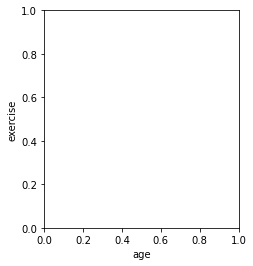

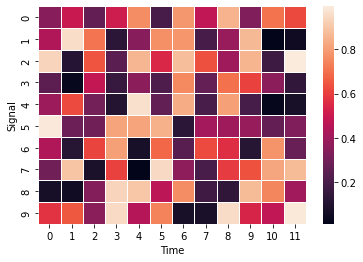

In [30]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

#uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(df_pre, linewidth=0.5)

# create categories
categories = (
    'r(AXII)',
    'r(AVI)',
    'EN(A)',
    'EN(B)',
    "l(A-O)",
    "l(B-O)",
    "tG",
    "τ",
    "μ",
    "v(A) 1",
    "v(A) 2",
    "v(A) 3"

)

for i, name in enumerate(categories):
    
    # filter dataframe by value
    temp = data[data['weight_status']==name]
    
    # set default value to darker
    if i == 0:
        lines[name] = ax.scatter(
            temp['age'], 
            temp['exercise'], 
            c=colours[i], 
            alpha=0.5
        )
    else:
        lines[name] = ax.scatter(
            temp['age'], 
            temp['exercise'], 
            c=colours[i], 
            alpha=0.05
        )

# create radio box
radio_ax = plt.axes(
    [0.0, 0.45, 0.3, 0.3], 
    facecolor='#FFDDAA'
)

# create radio buttons
radio = matplotlib.widgets.RadioButtons(
    radio_ax, 
    categories,
)

# callback function to run when buttons are pressed
def callback(label: str):
    """Changes the transparency of `lines`"""
    for name, line in lines.items():
        if name == label:
            line.set_alpha(0.5)
        else:
            line.set_alpha(0)
    return

# connect function to radio object and show
radio.on_clicked(callback)
plt.show()

# initialise empty dictionary
lines = {}



#set labels
ax.set_xlabel('Time')
ax.set_ylabel('Signal')


plt.show()